# 🌾 Introduction

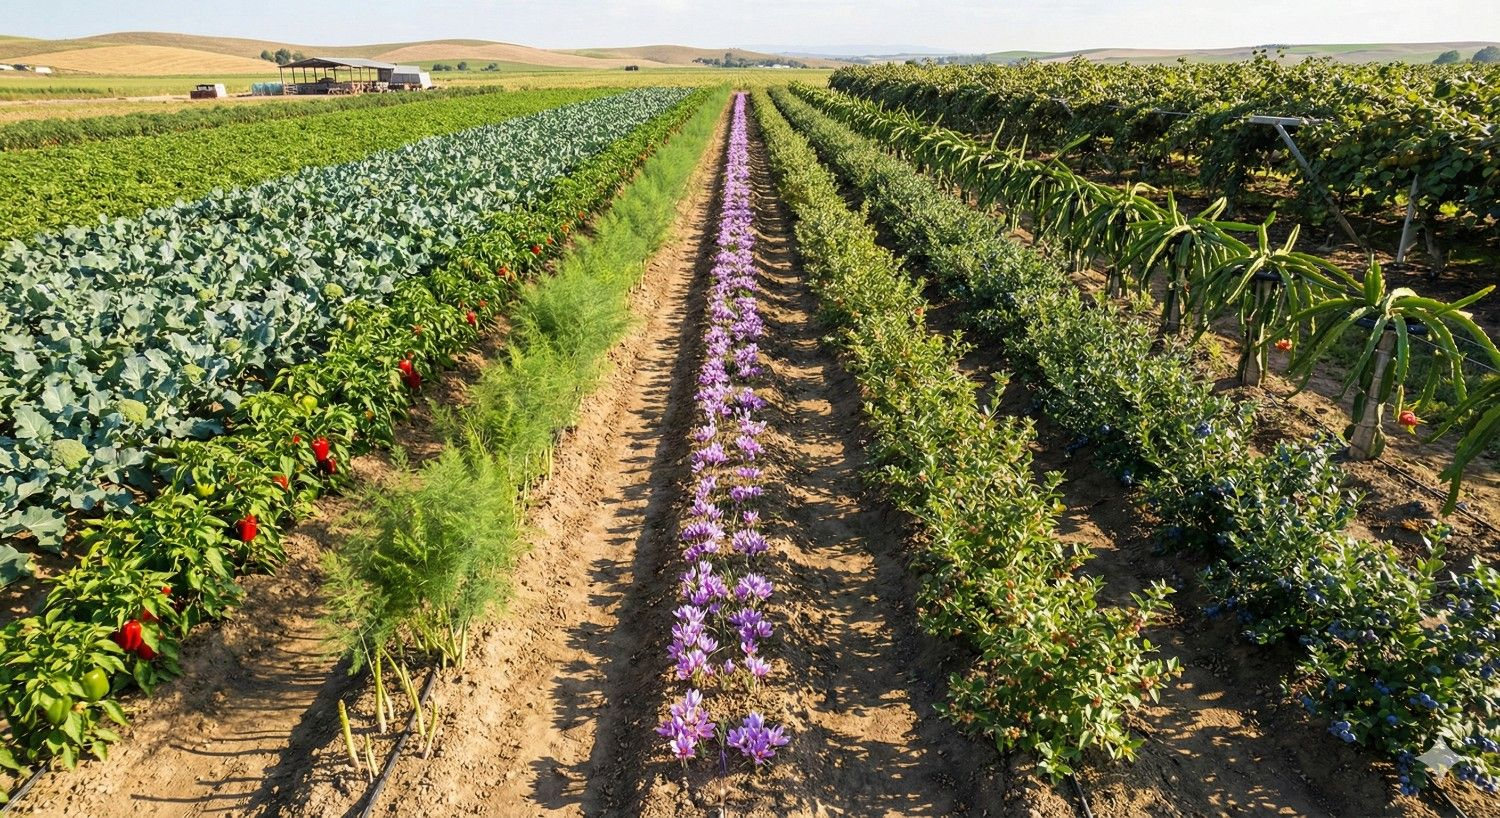

Machine Learning for High-Profit Exotic Crop Selection

- Agriculture is moving beyond traditional crops, with farmers increasingly exploring exotic crops to improve profitability and long-term sustainability. These crops often offer higher market value, but they also demand precise soil, climate, and financial conditions to grow successfully.

- This notebook presents a Machine Learning–based Exotic Crop Recommendation System that learns from agricultural data to recommend the most suitable exotic crop for given environmental and financial conditions, supporting smart and data-driven farming decisions.

# 🎯 Problem Statement

### Selecting the right exotic crop is difficult due to the complex interaction of soil, climate, and budget constraints. This project aims to build a machine learning–based classification system that recommends the most suitable exotic crop based on these parameters for smart and data-driven farming decisions.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# For Train-Test-Split
from sklearn.model_selection import train_test_split

# For Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# For Model-Selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# For Model-Tuning
from sklearn.model_selection import RandomizedSearchCV

# Dataset Overview

## • Data Load

In [5]:
df = pd.read_csv('../data/exotic_crops_balanced.csv')

## • Basic Checks

In [6]:
df.head()

,Crop_Name,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,Soil_pH,Rainfall,Altitude_msl,Soil_Type,Organic_Carbon,Budget_per_Acre,Sunlight_Hours
0,Ashwagandha,33.288533,39.585843,35.453509,34.327389,51.978563,7.613602,347.325648,65,Sandy Loam,0.34,48261,9.468682
1,Ashwagandha,35.408318,19.459761,45.782611,32.284847,59.048328,7.093736,407.678294,1352,Sandy Loam,0.51,71877,8.164222
2,Ashwagandha,47.152213,27.677289,49.259580,33.104765,48.382271,6.628539,331.560424,1493,Sandy Loam,0.36,60313,7.654793
3,Ashwagandha,35.512867,42.218817,29.517252,27.163838,60.327735,7.149207,503.743024,589,Sandy Loam,0.42,65377,7.791868
4,Ashwagandha,48.196010,26.897079,54.168901,24.396079,61.140247,7.498936,458.097977,1308,Sandy Loam,0.75,43896,7.750593


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop_Name        14000 non-null  object 
 1   Nitrogen         14000 non-null  float64
 2   Phosphorous      14000 non-null  float64
 3   Potassium        14000 non-null  float64
 4   Temperature      14000 non-null  float64
 5   Humidity         14000 non-null  float64
 6   Soil_pH          14000 non-null  float64
 7   Rainfall         14000 non-null  float64
 8   Altitude_msl     14000 non-null  int64  
 9   Soil_Type        14000 non-null  object 
 10  Organic_Carbon   14000 non-null  float64
 11  Budget_per_Acre  14000 non-null  int64  
 12  Sunlight_Hours   14000 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 1.4+ MB


In [8]:
df.describe()

,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,Soil_pH,Rainfall,Altitude_msl,Organic_Carbon,Budget_per_Acre,Sunlight_Hours
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,90.110015,49.537306,98.605557,22.127274,72.875873,6.282718,1147.642313,886.735857,1.898804,219165.744714,6.181096
std,40.184990,19.378117,44.784837,5.345960,13.282085,0.731091,661.314900,652.122609,1.116309,112199.970737,2.080177
min,6.733104,3.372260,7.002671,7.138133,25.750492,4.500000,262.651305,0.000000,0.300000,30109.000000,0.000000
25%,52.848423,36.327669,63.040785,18.104442,64.495628,5.793470,663.641251,347.000000,1.070000,115669.750000,5.476129
50%,95.882543,50.037978,101.806756,22.166298,74.745095,6.243140,948.378127,765.000000,1.620000,214709.000000,6.668779
75%,121.061004,62.530150,133.056372,26.038052,83.288797,6.764501,1401.074946,1315.250000,2.420000,307854.500000,7.552016
max,195.428619,105.985677,207.748301,38.756620,95.000000,8.500000,3025.843875,3000.000000,5.000000,499628.000000,10.872512


In [9]:
target_feature = df['Crop_Name']
target_feature.unique()

array(['Ashwagandha', 'Asparagus', 'Avocado', 'Blueberries', 'Broccoli',
       'Button Mushroom', 'Colored Pepper', 'Dragon Fruit', 'Kiwi',
       'Mangosteen', 'Rambutan', 'Saffron', 'Shiitake Mushroom',
       'Vanilla'], dtype=object)

In [10]:
target_feature.value_counts()

Crop_Name
Ashwagandha          1000
Asparagus            1000
Avocado              1000
Blueberries          1000
Broccoli             1000
Button Mushroom      1000
Colored Pepper       1000
Dragon Fruit         1000
Kiwi                 1000
Mangosteen           1000
Rambutan             1000
Saffron              1000
Shiitake Mushroom    1000
Vanilla              1000
Name: count, dtype: int64

### 🎯 Target Variable

The target variable for this project is **Crop_Name**, which represents the exotic crop to be recommended.  
We inspect its unique values to understand the number of crop classes involved in this multi-class classification problem.

#  Exploratory Data Analysis(EDA)

In [11]:
# Seprating Continuous & Categorical data

df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

print(f'These are the Numerical Columns: \n {df_num.columns}')
print("----"*20)
print(f'These are the Categorical Columns: \n {df_cat.columns}')

These are the Numerical Columns: 
 Index(['Nitrogen', 'Phosphorous', 'Potassium', 'Temperature', 'Humidity',
       'Soil_pH', 'Rainfall', 'Altitude_msl', 'Organic_Carbon',
       'Budget_per_Acre', 'Sunlight_Hours'],
      dtype='object')
--------------------------------------------------------------------------------
These are the Categorical Columns: 
 Index(['Crop_Name', 'Soil_Type'], dtype='object')


In [12]:
crop_details = pd.pivot_table(df_num,index=df['Crop_Name'],aggfunc='mean')
crop_details

,Altitude_msl,Budget_per_Acre,Humidity,Nitrogen,Organic_Carbon,Phosphorous,Potassium,Rainfall,Soil_pH,Sunlight_Hours,Temperature
Crop_Name,,,,,,,,,,,
Ashwagandha,733.195,55296.319,50.074730,45.189615,0.54177,29.796928,45.225804,448.206394,7.260389,7.997419,27.529536
Asparagus,740.854,200571.930,65.150931,120.993895,1.40347,59.742752,149.969401,696.373862,7.022128,7.991554,22.661988
Avocado,729.593,226201.956,67.937320,114.416311,1.49365,60.277657,130.234167,1301.607174,5.999392,6.998765,22.432514
Blueberries,1253.834,352484.592,77.466180,65.405977,2.99752,40.219721,80.743495,1105.136771,5.032356,7.002702,19.075065
Broccoli,1019.873,90310.480,67.931962,140.072322,1.49142,74.548430,125.065383,652.733626,6.580055,5.951496,18.372787
Button Mushroom,981.462,91031.234,85.350360,30.355424,3.94624,20.108209,29.743171,803.247088,6.978888,0.998160,17.112256
Colored Pepper,586.448,174776.657,70.061215,149.279556,1.14729,79.260908,159.478511,899.026067,6.177472,7.039402,24.092057
Dragon Fruit,768.889,160240.883,69.875842,99.844274,0.74534,49.947174,99.795612,902.895708,6.152796,7.038008,24.838663
Kiwi,1404.166,277098.097,77.152403,124.650685,1.39632,70.006232,149.736537,1158.333621,6.000018,6.514461,17.419945


## • Visualization

- Histogram
- Coutplot
- Box-plot
- Heatmap

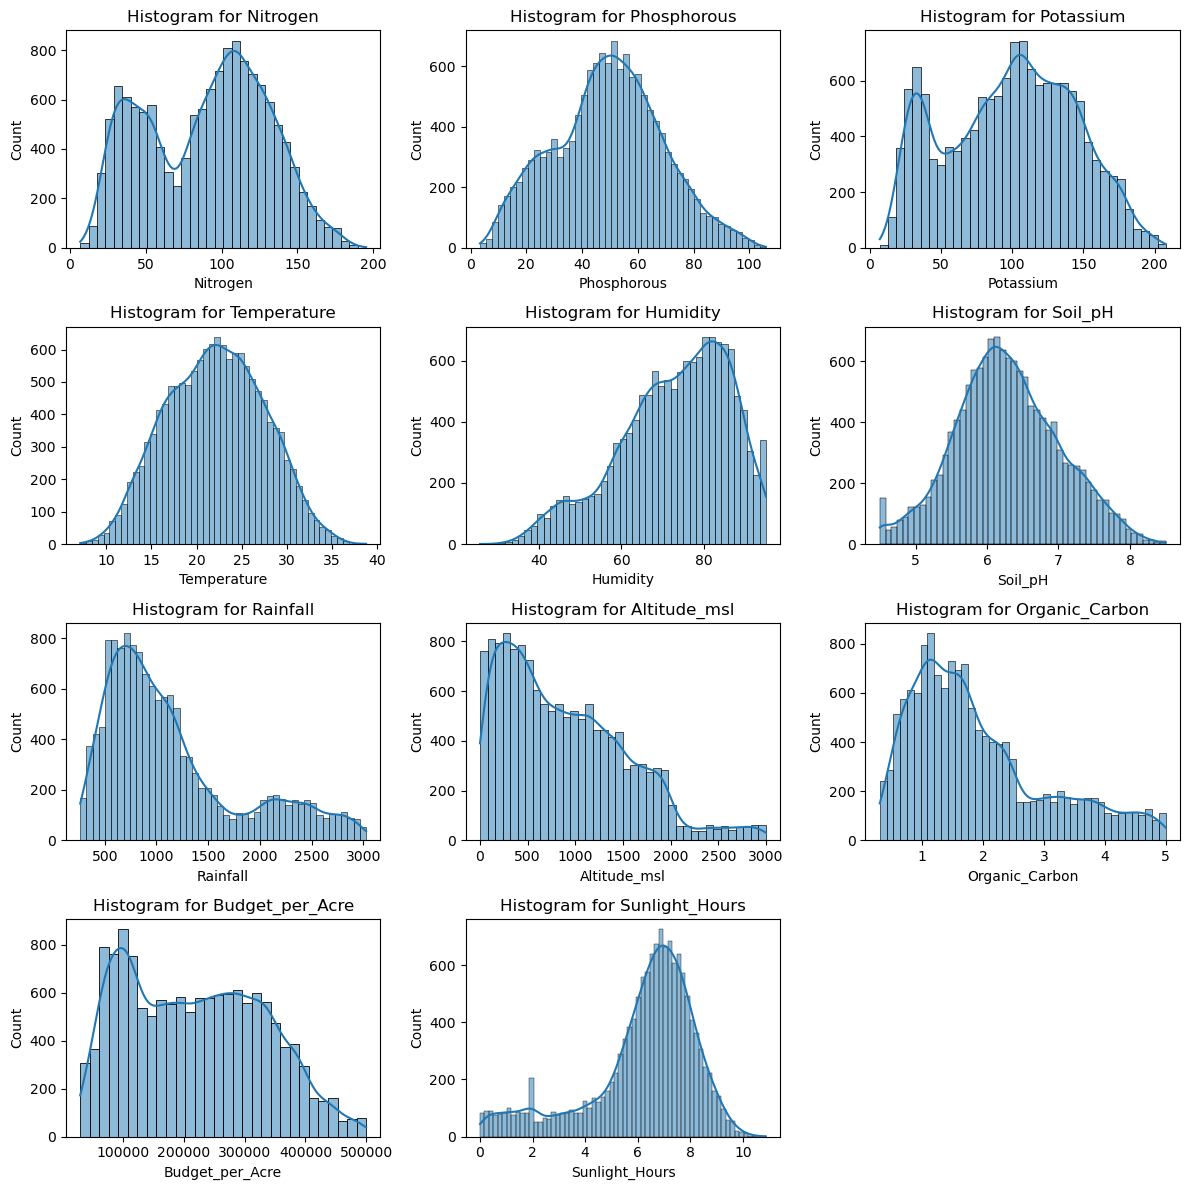

In [13]:
# Histogram
plt.figure(figsize=(12, 12))
for idx, col in enumerate(df_num.columns):
    plt.subplot(4, (len(df_num.columns)//4)+1, idx+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram for {col}')
plt.tight_layout()
plt.show()

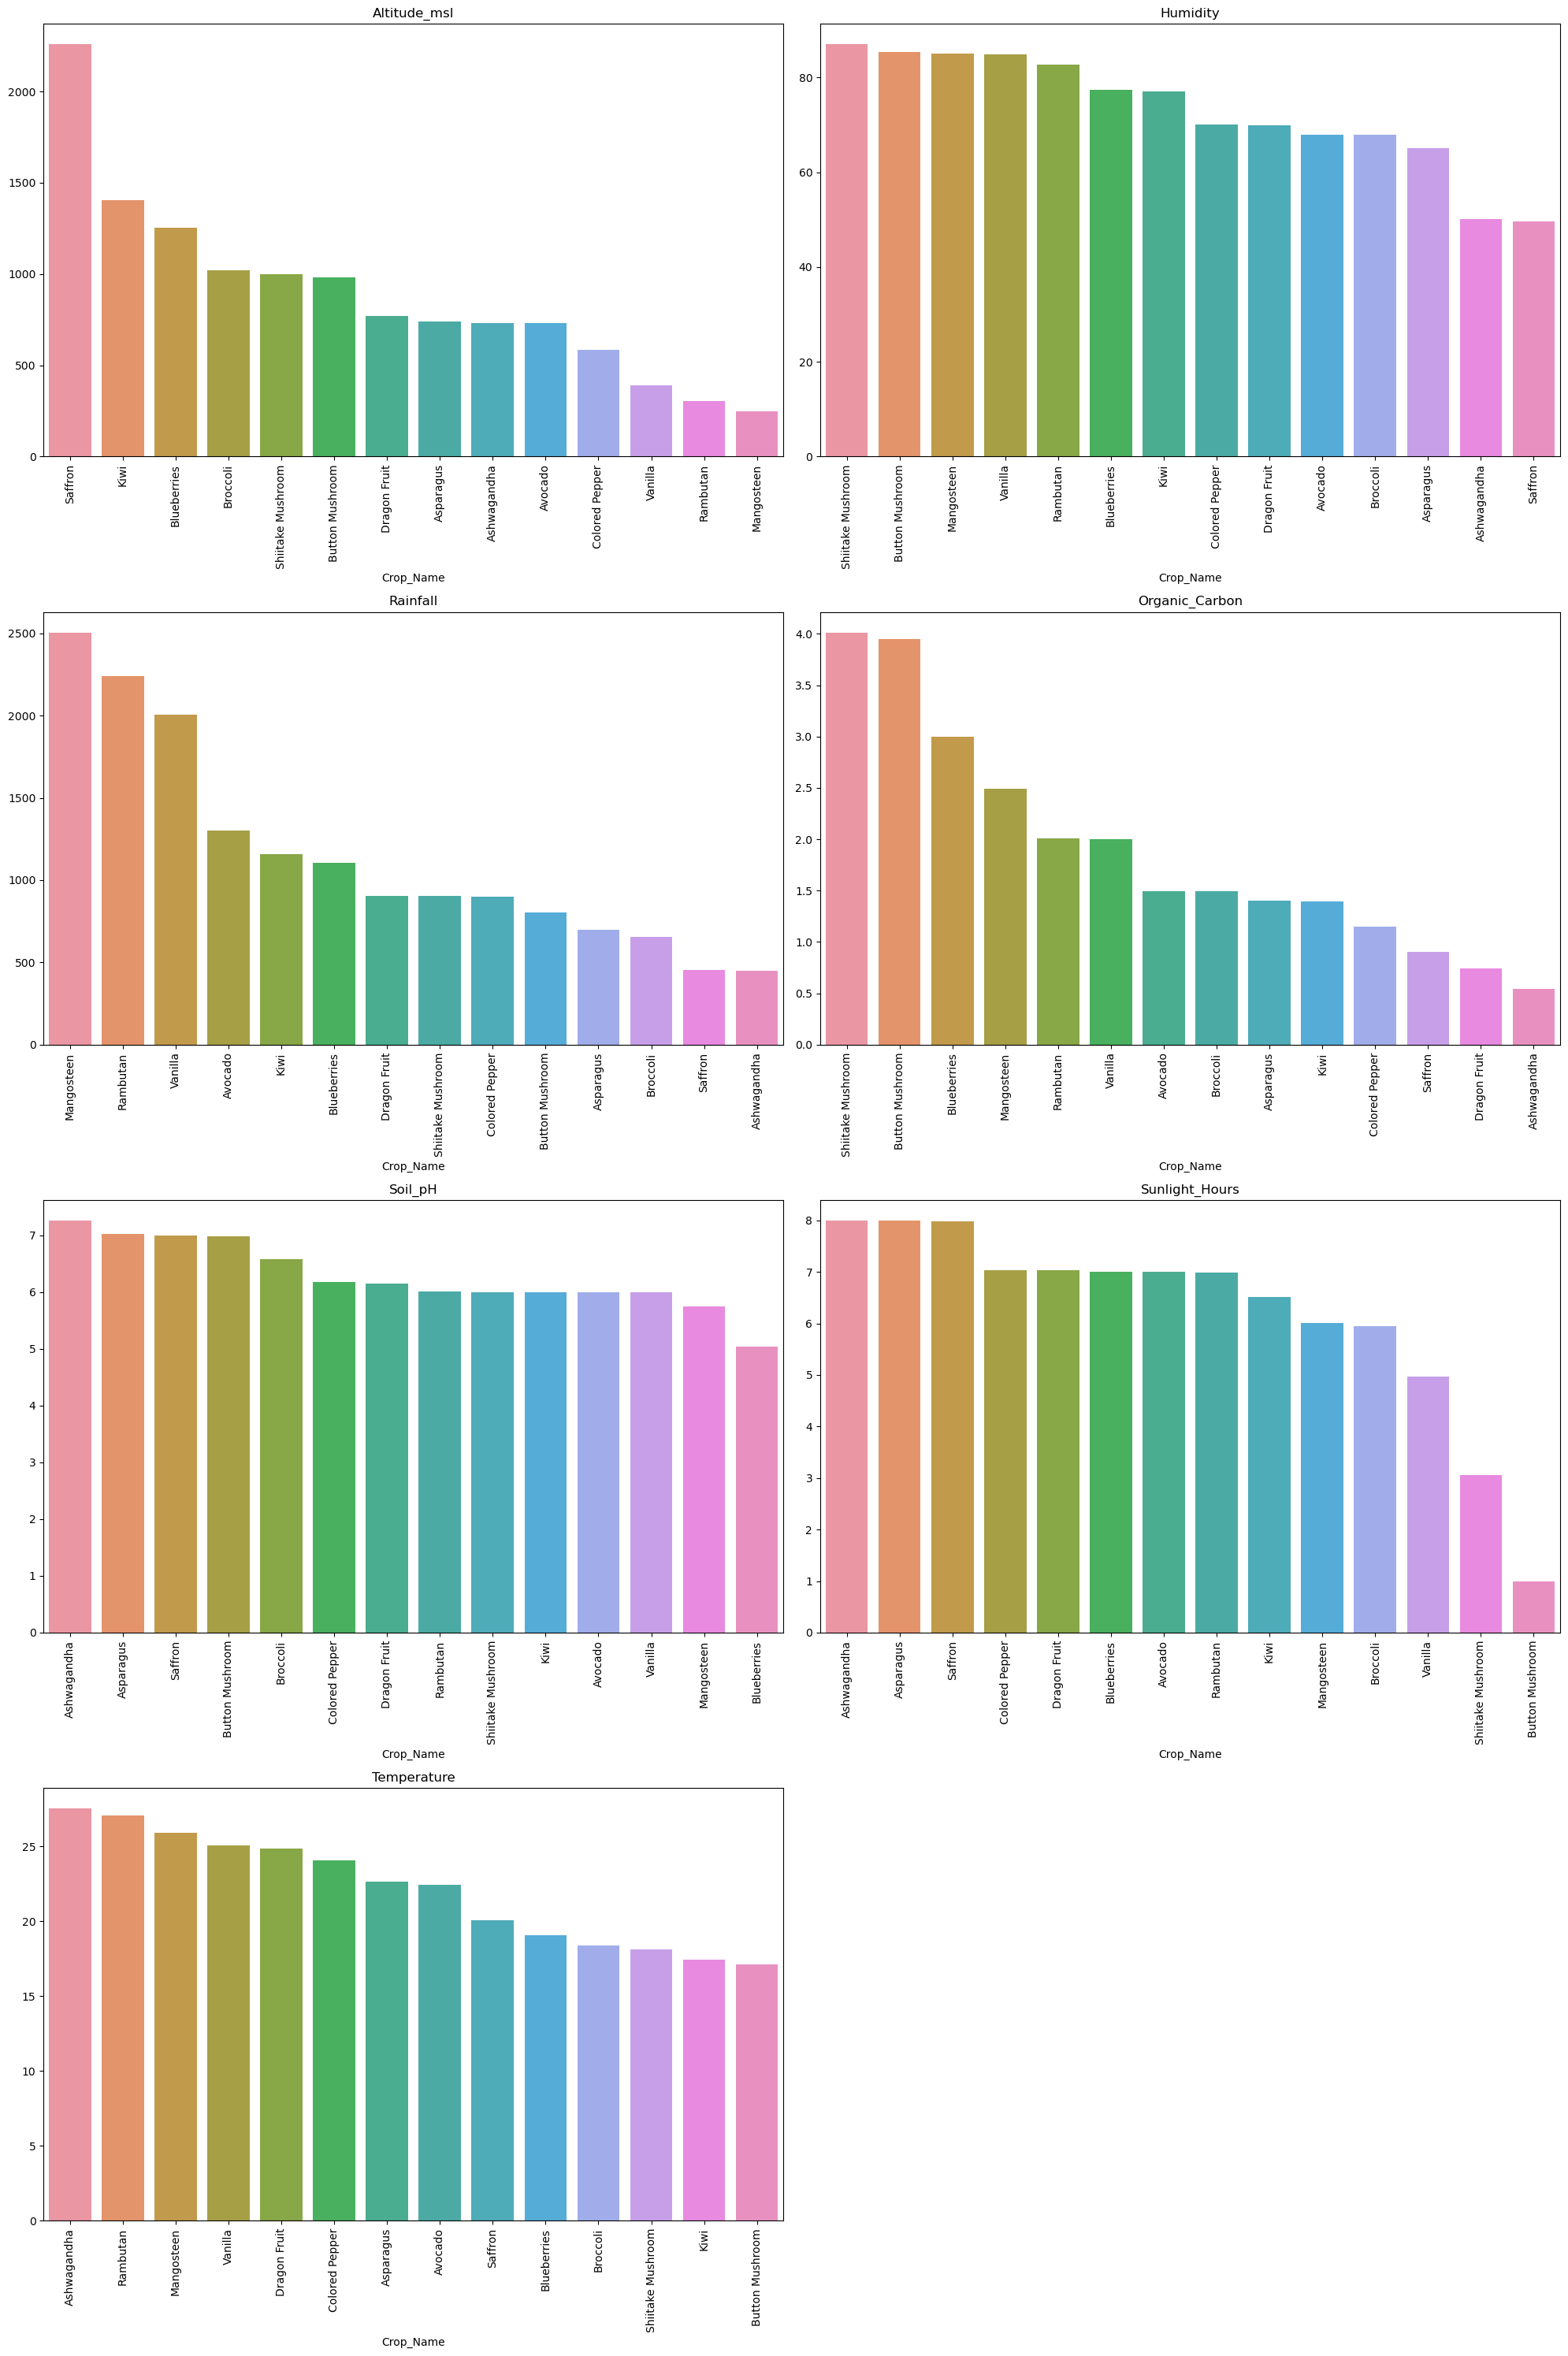

In [14]:
columns = ['Altitude_msl','Humidity','Rainfall','Organic_Carbon',
           'Soil_pH','Sunlight_Hours','Temperature']

plt.figure(figsize=(20, 30))  # One big figure

for i, col in enumerate(columns):
    plt.subplot(4, 2, i + 1)  # 4 rows, 2 columns
    sorted_col = crop_details[col].sort_values(ascending=False)
    sns.barplot(x=sorted_col.index,y=sorted_col.values)
    plt.title(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


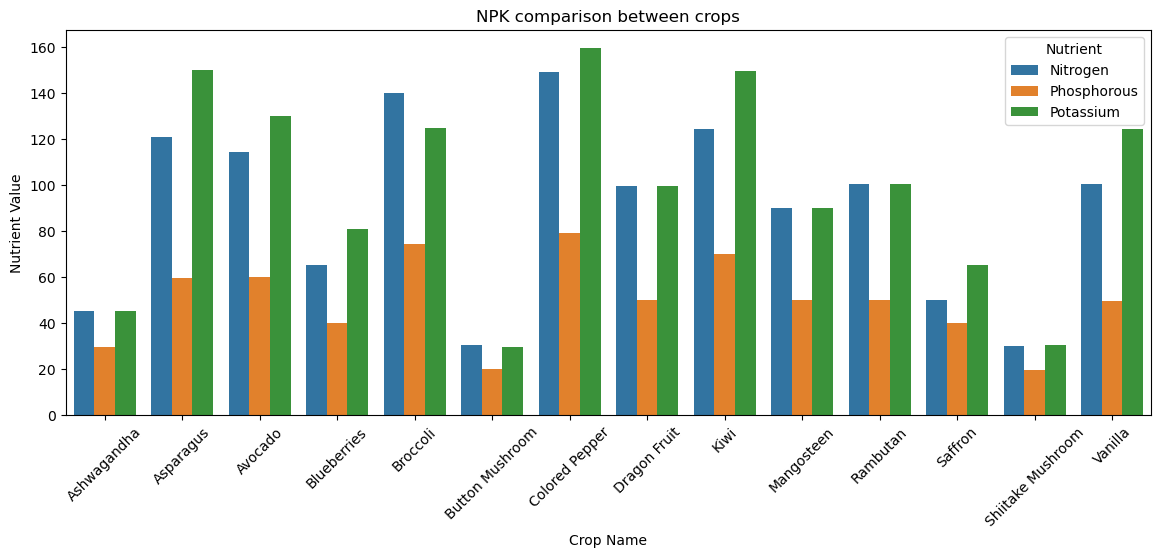

In [15]:
# Step 1: Convert data to long format (required for grouped bars)
plot_df = crop_details.reset_index().melt(
    id_vars='Crop_Name',
    value_vars=['Nitrogen', 'Phosphorous', 'Potassium'],
    var_name='Nutrient',
    value_name='Value'
)


# Step 2: Create bar plot
plt.figure(figsize=(14,5))

sns.barplot(
    data=plot_df,
    x='Crop_Name',
    y='Value',
    hue='Nutrient'
)

# Step 3: Beautify the plot
plt.title('NPK comparison between crops')
plt.xticks(rotation=45)
plt.xlabel('Crop Name')
plt.ylabel('Nutrient Value')
plt.legend(title='Nutrient')

plt.show()

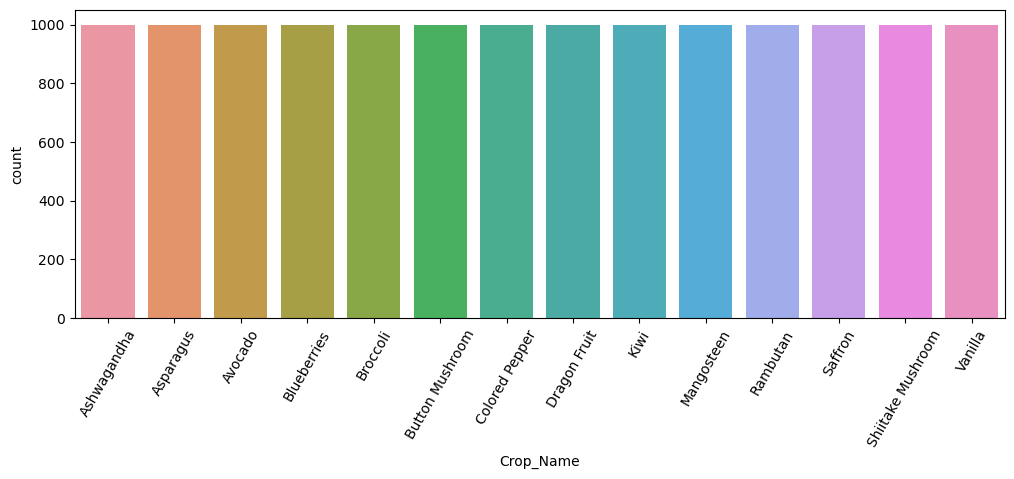

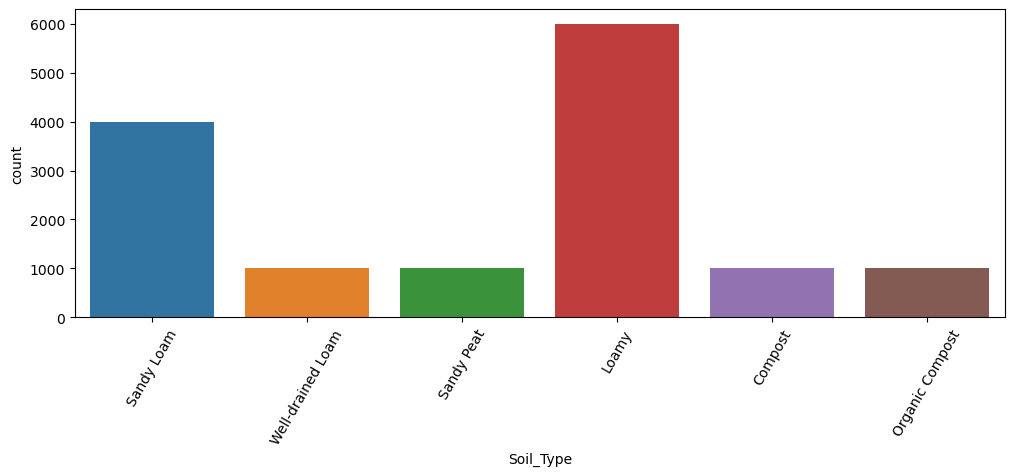

In [16]:
# Countplot
for col in df_cat.columns:
    plt.figure(figsize=(12,4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=60)
    plt.show()

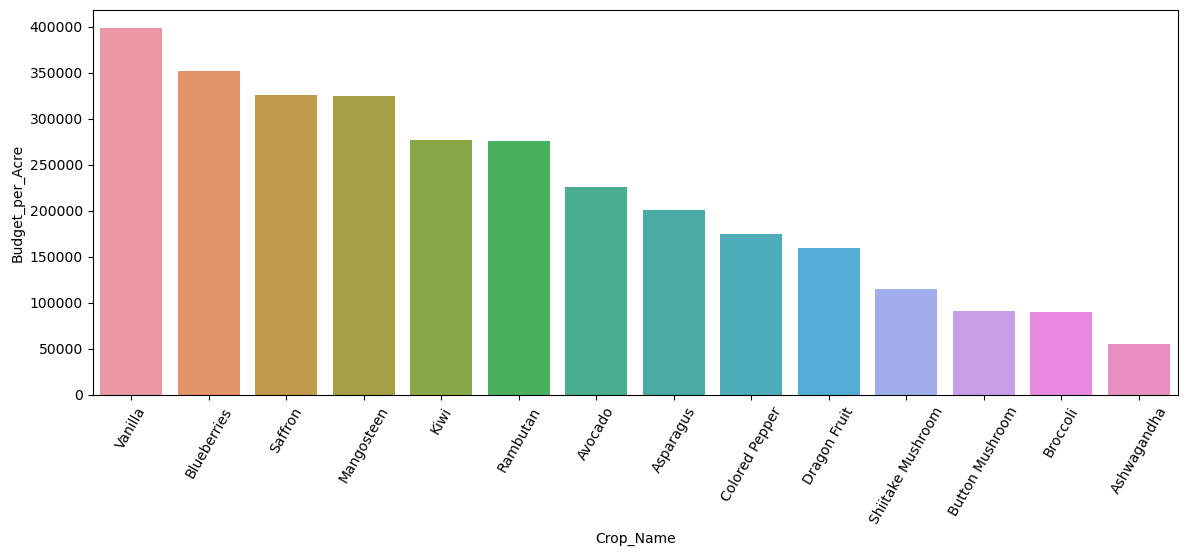

In [17]:
plt.figure(figsize=(14,5))
sns.barplot(y=crop_details['Budget_per_Acre'][0:].sort_values(ascending=False),x=crop_details['Budget_per_Acre'][0:].sort_values(ascending=False).index)
plt.xticks(rotation=60)
plt.show()

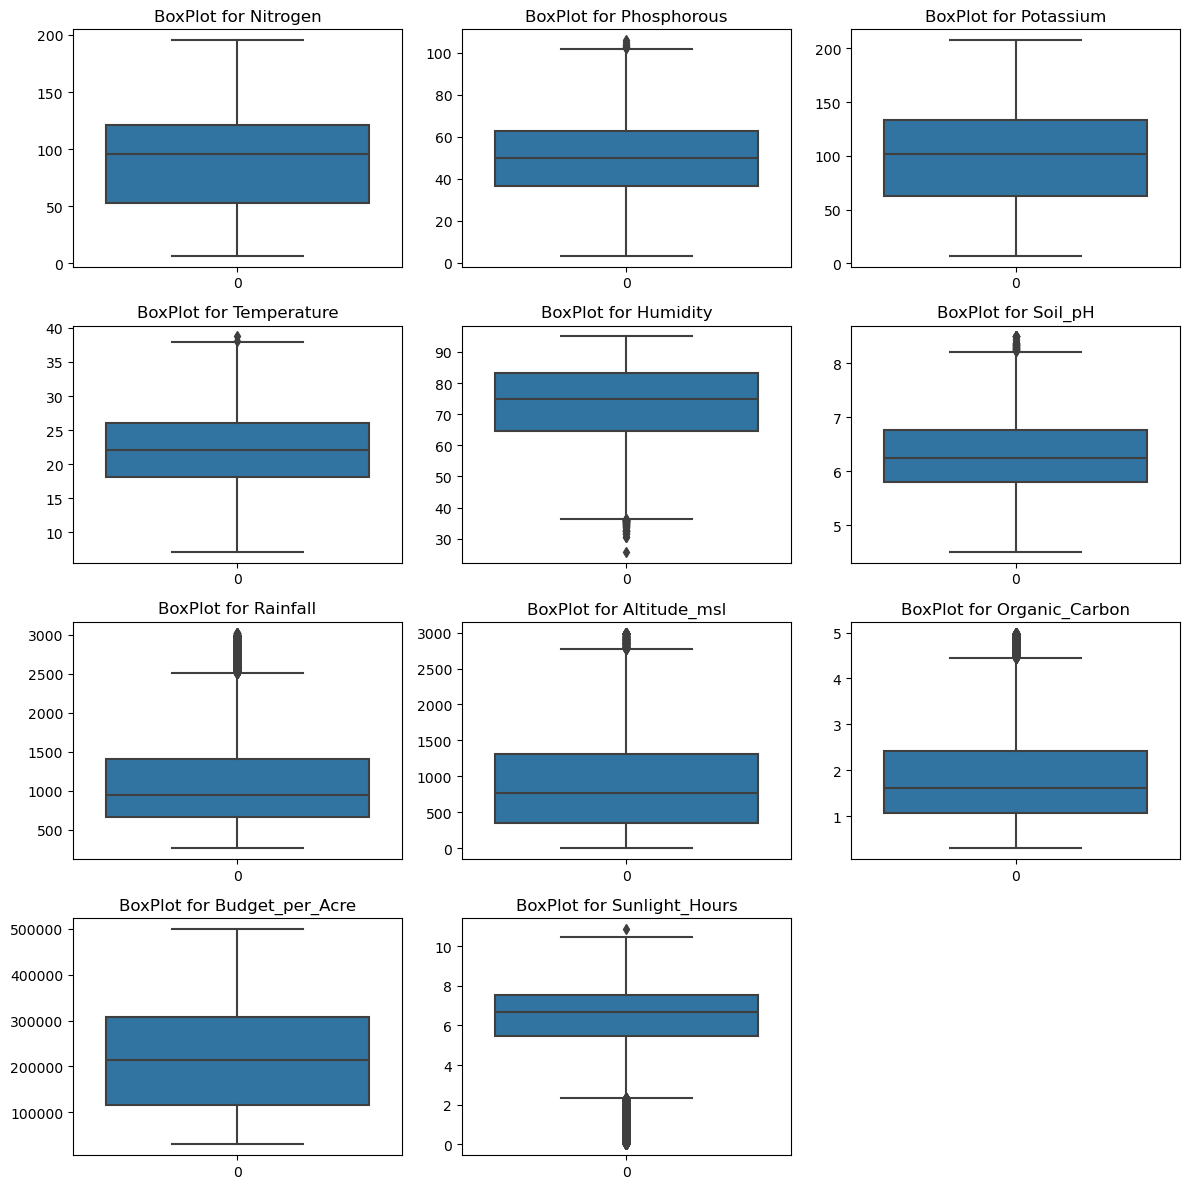

In [18]:
# Boxplot
plt.figure(figsize=(12, 12))
for idx, col in enumerate(df_num.columns):
    plt.subplot(4, (len(df_num.columns)//4)+1, idx+1)
    sns.boxplot(df[col])
    plt.title(f'BoxPlot for {col}')
plt.tight_layout()
plt.show()

In [19]:
agg_df = (
    df
    .groupby('Crop_Name')[df_num.columns]
    .agg(['min', 'max'])
)


final_ranges = agg_df.stack(level=1)


final_ranges = final_ranges.reorder_levels([0, 1])


final_ranges = final_ranges.sort_index(level=[0, 1])

final_ranges

Nitrogen  Phosphorous   Potassium  Temperature  \
Crop_Name                                                                 
Ashwagandha       max   73.822245    47.031229   69.559794    38.756620   
                  min   15.862124    14.137064   18.623319    15.687040   
Asparagus         max  150.368796    78.837417  187.636359    33.445726   
                  min   90.703229    41.916218  115.876333    12.094253   
Avocado           max  150.827039    78.196578  172.302304    33.419453   
                  min   78.107842    43.688779   95.130277    10.924667   
Blueberries       max   89.314478    56.293010  108.157982    29.451026   
                  min   37.405845    23.000531   51.166254     7.953051   
Broccoli          max  176.711655    95.524057  163.194730    27.997278   
                  min  111.410837    54.199411   90.669577     7.999421   
Button Mushroom   max   51.599818    35.289867   53.144711    25.182539   
                  min    6.733104     3.482340    7.363808    10.499567   
Colored Pepper    max  195.428619   105.985677  207.748301    34.151174   
                  min  110.195437    52.016014  114.790009    13.601295   
Dragon Fruit      max  131.063077    66.102187  129.506112    36.038572   
                  min   67.393248    33.015364   71.823619    14.309878   
Kiwi              max  159.696908    87.845800  185.854639    28.830122   
                  min   88.040219    51.811871  113.033705     7.138133   
Mangosteen        max  127.639167    67.331537  117.699432    33.419865   
                  min   62.877583    32.574888   58.170620    18.027331   
Rambutan          max  129.735180    67.415557  128.102165    35.779866   
                  min   70.936061    32.444042   72.245031    18.315749   
Saffron           max   69.765298    56.805808   89.215680    29.202660   
                  min   26.273502    20.324081   42.614263    10.257610   
Shiitake Mushroom max   52.089413    37.801382   48.279176    27.475574   
                  min    8.665996     3.372260    7.002671     8.994674   
Vanilla           max  131.106017    67.807442  155.920004    33.840626   
                  min   62.823999    31.547333   89.354970    16.767967   

                        Humidity   Soil_pH     Rainfall  Altitude_msl  \
Crop_Name                                                               
Ashwagandha       max  69.275128  8.500000   635.913126          1500   
                  min  25.750492  5.996533   262.651305             1   
Asparagus         max  81.212672  8.255545   916.669486          1497   
                  min  47.439233  6.031225   482.432608             3   
Avocado           max  84.542527  7.113621  1625.571539          1500   
                  min  53.558243  4.918406   980.461894             0   
Blueberries       max  94.091901  6.211529  1425.131196          1999   
                  min  61.583554  4.500000   773.762613           500   
Broccoli          max  86.352810  7.762589   828.011488          2000   
                  min  51.485769  5.259109   471.989256             2   
Button Mushroom   max  95.000000  8.116497  1017.384166          1998   
                  min  70.398560  5.734298   571.878406             0   
Colored Pepper    max  89.498263  7.280093  1225.537442          1199   
                  min  49.970392  4.670814   582.713131             1   
Dragon Fruit      max  90.114201  7.490224  1330.454252          1500   
                  min  50.954898  4.795048   471.063047             0   
Kiwi              max  95.000000  6.985555  1520.060700          1999   
                  min  59.828873  4.912772   782.756804           802   
Mangosteen        max  95.000000  6.970521  3025.843875           500   
                  min  66.645090  4.501967  1994.786806             0   
Rambutan          max  95.000000  7.415976  3022.679551           600   
                  min  65.947508  4.990614  1467.014960             0   
Saffron           max 

<Axes: >

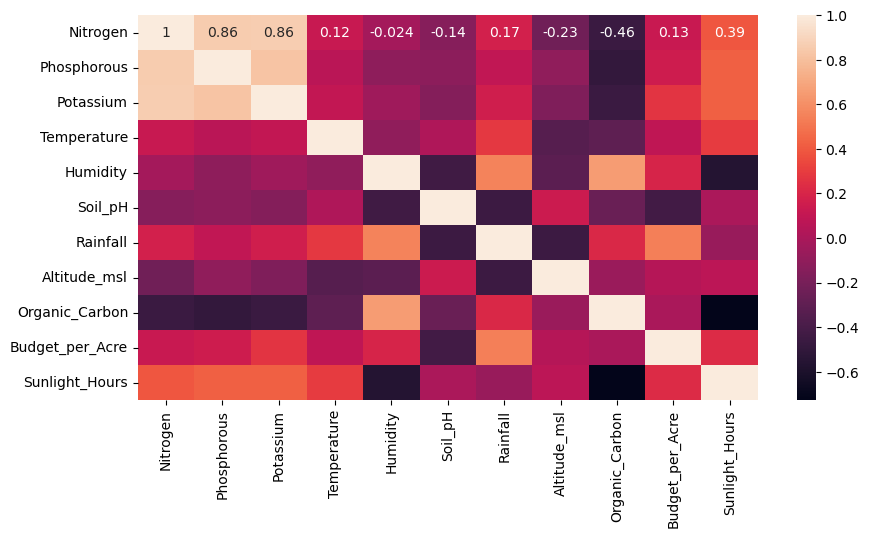

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Visual Insights Summary

- The dataset shows a balanced distribution across exotic crops, reducing class bias and supporting fair model training.

- Soil nutrient requirements (Nitrogen, Phosphorous, Potassium) vary significantly across crops, highlighting nutrient intensity as a key differentiator in crop recommendation.

- Distinct temperature–humidity clusters are observed for different crops, confirming strong climate sensitivity in exotic crop selection.

- Soil pH values fall within realistic agricultural ranges, with subtle differences influencing crop suitability.

- Rainfall and altitude jointly separate tropical, temperate, and high-altitude crops, capturing diverse agro-climatic conditions.

- Budget per acre varies substantially across crops, making financial feasibility a critical real-world decision factor.

- Organic carbon requirements differ by crop, especially for mushrooms and berries that depend on richer soil composition.

- Sunlight hours clearly distinguish low-light crops from high-light fruit crops, improving interpretability of recommendations.

- Most features show low to moderate correlation, indicating that each contributes unique information to the model.

- Overall, the visual analysis confirms strong crop-wise differentiation with realistic feature ranges, supporting robust multi-class classification.

# Data Preprocessing

In [21]:
X = df.drop('Crop_Name',axis=1)
y = df['Crop_Name']

In [22]:
X.head()

,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,Soil_pH,Rainfall,Altitude_msl,Soil_Type,Organic_Carbon,Budget_per_Acre,Sunlight_Hours
0,33.288533,39.585843,35.453509,34.327389,51.978563,7.613602,347.325648,65,Sandy Loam,0.34,48261,9.468682
1,35.408318,19.459761,45.782611,32.284847,59.048328,7.093736,407.678294,1352,Sandy Loam,0.51,71877,8.164222
2,47.152213,27.677289,49.259580,33.104765,48.382271,6.628539,331.560424,1493,Sandy Loam,0.36,60313,7.654793
3,35.512867,42.218817,29.517252,27.163838,60.327735,7.149207,503.743024,589,Sandy Loam,0.42,65377,7.791868
4,48.196010,26.897079,54.168901,24.396079,61.140247,7.498936,458.097977,1308,Sandy Loam,0.75,43896,7.750593


In [23]:
y.head()

0    Ashwagandha
1    Ashwagandha
2    Ashwagandha
3    Ashwagandha
4    Ashwagandha
Name: Crop_Name, dtype: object

## • Label-Encoder

In [24]:
le = LabelEncoder()

y = le.fit_transform(y)

# See mapping
CropName_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
CropName_mapping

{'Ashwagandha': 0,
 'Asparagus': 1,
 'Avocado': 2,
 'Blueberries': 3,
 'Broccoli': 4,
 'Button Mushroom': 5,
 'Colored Pepper': 6,
 'Dragon Fruit': 7,
 'Kiwi': 8,
 'Mangosteen': 9,
 'Rambutan': 10,
 'Saffron': 11,
 'Shiitake Mushroom': 12,
 'Vanilla': 13}

## • One-Hot Encoding

In [25]:
X = pd.get_dummies(X)
X = X.astype(int)

In [26]:
X.head()

,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,Soil_pH,Rainfall,Altitude_msl,Organic_Carbon,Budget_per_Acre,Sunlight_Hours,Soil_Type_Compost,Soil_Type_Loamy,Soil_Type_Organic Compost,Soil_Type_Sandy Loam,Soil_Type_Sandy Peat,Soil_Type_Well-drained Loam
0,33,39,35,34,51,7,347,65,0,48261,9,0,0,0,1,0,0
1,35,19,45,32,59,7,407,1352,0,71877,8,0,0,0,1,0,0
2,47,27,49,33,48,6,331,1493,0,60313,7,0,0,0,1,0,0
3,35,42,29,27,60,7,503,589,0,65377,7,0,0,0,1,0,0
4,48,26,54,24,61,7,458,1308,0,43896,7,0,0,0,1,0,0


## • Standard Scaler

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.408693,-0.517951,-1.409115,2.310014,-1.608702,1.543914,-1.209969,-1.260139,-1.227600,-1.523270,1.592502,-0.27735,-0.866025,-0.27735,1.581139,-0.27735,-0.27735
1,-1.358925,-1.549807,-1.185836,1.936534,-1.006731,1.543914,-1.119237,0.713487,-1.227600,-1.312781,1.112037,-0.27735,-0.866025,-0.27735,1.581139,-0.27735,-0.27735
2,-1.060313,-1.137065,-1.096525,2.123274,-1.834440,0.280408,-1.234164,0.929711,-1.227600,-1.415851,0.631572,-0.27735,-0.866025,-0.27735,1.581139,-0.27735,-0.27735
3,-1.358925,-0.363173,-1.543082,1.002834,-0.931485,1.543914,-0.974067,-0.456581,-1.227600,-1.370715,0.631572,-0.27735,-0.866025,-0.27735,1.581139,-0.27735,-0.27735
4,-1.035429,-1.188658,-0.984885,0.442614,-0.856238,1.543914,-1.042116,0.646012,-1.227600,-1.562175,0.631572,-0.27735,-0.866025,-0.27735,1.581139,-0.27735,-0.27735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.407858,0.462312,0.756688,1.002834,1.024919,-0.983098,1.995875,-0.968772,-0.350788,0.829381,-0.809824,-0.27735,1.154701,-0.27735,-0.632456,-0.27735,-0.27735
13996,-0.064943,0.255941,0.466426,1.189574,1.325904,-0.983098,1.409145,-1.122123,0.526025,1.332314,-0.809824,-0.27735,1.154701,-0.27735,-0.632456,-0.27735,-0.27735
13997,0.606933,0.307534,0.176164,0.816094,1.100166,-0.983098,0.922220,-0.746414,-0.350788,1.607101,-1.290290,-0.27735,1.154701,-0.27735,-0.632456,-0.27735,-0.27735
13998,0.283437,0.307534,0.779016,1.376314,0.573441,0.280408,1.381926,-0.577728,-0.350788,0.795316,-0.329359,-0.27735,1.154701,-0.27735,-0.632456,-0.27735,-0.27735


In [29]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
13995,13
13996,13
13997,13
13998,13


# Train-Test-Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Model Selection

In [31]:
models = {
    "LR": LogisticRegression(),
    "NB": GaussianNB(),
    "SVM": SVC(probability=True),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

results = []

In [32]:
for name,model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='weighted')
    results.append({
        "Model": name,
        "Accuracy":round(acc,4),
        "F1 score":round(f1,4)
    })

In [33]:
results

[{'Model': 'LR', 'Accuracy': 0.9764, 'F1 score': 0.9765},
 {'Model': 'NB', 'Accuracy': 0.9564, 'F1 score': 0.956},
 {'Model': 'SVM', 'Accuracy': 0.9764, 'F1 score': 0.9765},
 {'Model': 'DecisionTree', 'Accuracy': 0.9698, 'F1 score': 0.9698},
 {'Model': 'RandomForest', 'Accuracy': 0.9814, 'F1 score': 0.9815},
 {'Model': 'XGBoost', 'Accuracy': 0.981, 'F1 score': 0.981}]

In [34]:
pd.DataFrame(results)

,Model,Accuracy,F1 score
0,LR,0.9764,0.9765
1,NB,0.9564,0.9560
2,SVM,0.9764,0.9765
3,DecisionTree,0.9698,0.9698
4,RandomForest,0.9814,0.9815
5,XGBoost,0.9810,0.9810


# Model Tuning

## Random Forest Classifier

In [35]:
rf_model = RandomForestClassifier()

In [36]:
# 📌 Feature scaling was not applied as Random Forest is a tree-based algorithm and is invariant to feature magnitude.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
train_acc = rf_model.score(X_train, y_train)
train_acc

1.0

In [39]:
test_acc = rf_model.score(X_test, y_test)
test_acc

0.9809523809523809

In [40]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

In [41]:
classifier_r = RandomizedSearchCV((rf_model),param_grid,n_iter=50, cv=5,return_train_score=False)

In [42]:
classifier_r.fit(X,y)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,50
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [43]:
results = pd.DataFrame(classifier_r.cv_results_)

In [44]:
results[['param_n_estimators','param_min_samples_split','param_min_samples_leaf','param_max_features','param_max_depth','mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,mean_test_score
21,300,2,1,log2,30,0.985000
9,200,2,1,log2,20,0.984929
39,200,10,1,sqrt,None,0.984857
26,200,10,1,sqrt,30,0.984857
34,300,10,2,sqrt,30,0.984786
33,200,10,1,sqrt,20,0.984714
48,200,5,1,sqrt,20,0.984643
6,300,10,1,sqrt,20,0.984643
3,300,5,2,log2,20,0.984643
15,300,10,1,log2,20,0.984643


In [45]:
rf_best_model = RandomForestClassifier(n_estimators=300,min_samples_split=2,min_samples_leaf=1,max_features='log2',max_depth=30)

In [46]:
rf_best_model.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
y_pred = rf_best_model.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

0.9821428571428571

# Model's Crop Recommendation 🌱✨

In [49]:
# Save column order for inference
model_columns = X.columns

def recommend_crop(
    Nitrogen,
    Phosphorous,
    Potassium,
    Temperature,
    Humidity,
    Soil_pH,
    Rainfall,
    Altitude_msl,
    Soil_Type,
    Organic_Carbon,
    Budget_per_Acre,
    Sunlight_Hours
):
    """
    Predict the most suitable exotic crop based on input conditions.
    """

    # Create input dataframe
    input_data = pd.DataFrame([{
        'Nitrogen': Nitrogen,
        'Phosphorous': Phosphorous,
        'Potassium': Potassium,
        'Temperature': Temperature,
        'Humidity': Humidity,
        'Soil_pH': Soil_pH,
        'Rainfall': Rainfall,
        'Altitude_msl': Altitude_msl,
        'Soil_Type': Soil_Type,
        'Organic_Carbon': Organic_Carbon,
        'Budget_per_Acre': Budget_per_Acre,
        'Sunlight_Hours': Sunlight_Hours
    }])

    # One-hot encode Soil_Type
    input_data = pd.get_dummies(input_data, columns=['Soil_Type'])

    # Align columns with training data
    input_data = input_data.reindex(columns=model_columns, fill_value=0)

    # Predict encoded class
    pred_encoded = rf_best_model.predict(input_data)[0]
    print(pred_encoded)

    # Decode to crop name
    predicted_crop = le.inverse_transform([pred_encoded])[0]

    return predicted_crop


In [52]:
df.sample(n=10)

,Crop_Name,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,Soil_pH,Rainfall,Altitude_msl,Soil_Type,Organic_Carbon,Budget_per_Acre,Sunlight_Hours
11015,Saffron,49.760229,50.538507,66.862977,25.693817,44.710341,7.735370,442.611906,2664,Sandy Loam,1.12,390425,8.412460
5262,Button Mushroom,23.322107,14.623583,19.161538,18.359744,75.601681,6.768902,739.819893,247,Compost,4.97,89636,1.620000
13511,Vanilla,84.588604,46.332248,130.748594,28.445637,79.200605,6.188239,2018.060340,62,Loamy,2.11,439096,5.720754
7219,Dragon Fruit,114.097600,55.911756,117.041899,26.536145,77.690665,6.812338,843.102674,988,Sandy Loam,0.83,190891,7.130236
12214,Shiitake Mushroom,48.591028,24.452885,39.674584,22.358684,82.302863,5.532272,789.991954,1251,Organic Compost,3.18,105886,2.000000
11756,Saffron,64.040336,39.378760,62.932931,22.355096,42.676374,6.323093,389.192996,1629,Sandy Loam,0.69,250509,7.018297
2367,Avocado,104.927312,63.301342,150.960347,28.819777,65.896856,5.606709,1198.140771,548,Well-drained Loam,1.10,162021,6.440142
8551,Kiwi,114.323483,71.620127,131.640218,21.756359,82.186265,5.643812,923.741155,1185,Loamy,1.20,214503,7.571497
12561,Shiitake Mushroom,29.647086,23.332537,22.292724,16.753379,80.901737,5.755961,1210.330807,1514,Organic Compost,3.53,87498,3.917482
2981,Avocado,106.275015,66.656200,98.908111,23.941953,73.813894,6.115825,1222.370975,678,Well-drained Loam,1.58,298160,6.249804


In [53]:
#Saffron : 49.760229	50.538507	66.862977	25.693817	44.710341	7.735370	442.611906	2664	Sandy Loam	1.12	390425	8.412460

recommend_crop(
    Nitrogen = 49,
    Phosphorous= 50,
    Potassium= 66,
    Temperature= 25,
    Humidity= 44,
    Soil_pH= 7.7,
    Rainfall= 442,
    Altitude_msl= 2664,
    Soil_Type= 'Sandy Loam',
    Organic_Carbon= 1.12,
    Budget_per_Acre= 390000,
    Sunlight_Hours= 8.41
)


11


'Saffron'

In [60]:
#Pickling necessary files
import os

os.makedirs("models", exist_ok=True)


import pickle
pickle.dump(rf_best_model, open('./models/rf_model.pkl', 'wb'))
pickle.dump(le, open('./models/label.pkl', 'wb'))
pickle.dump(model_columns, open("./models/model_columns.pkl", "wb"))